# Fantasy Premier League

## Team Formation

In this notebook, we will study the team formation of top managers from the **2020-2021** FPL Season.

In [1]:
import pandas as pd
import numpy as np

# Get fixtures
fixtures = pd.read_csv(
    "../data/fpl_official/vaastav/data/2020-21/fixtures.csv"
    )[['event', 'team_a', 'team_h']]

gw_type = {}
for gw in range(1, 39):
    if fixtures[fixtures['event'] == gw].shape[0] < 10:
        gw_type[gw] = 'BGW'
    elif fixtures[fixtures['event'] == gw].shape[0] > 10:
        gw_type[gw] = 'DGW'
    else :
        # Handle dgw for some & bgw for others
        playing_teams = (
            list(fixtures[fixtures['event'] == 1]['team_a'].values) +
            list(fixtures[fixtures['event'] == 1]['team_h'].values))
        if np.all([team_id in playing_teams for team_id in np.arange(1, 20)]):
            gw_type[gw] = 'Mixed'
        else:
            gw_type[gw] = 'Vanilla'

In [2]:
import glob
import os

path = '../data/fpl_official/2020-21/season/processed/'
all_files = (
    glob.glob(os.path.join(path, "team_formation_[0-9][0-9][0-9][0-9].csv")) +
    glob.glob(os.path.join(path, "team_formation_[0-9][0-9][0-9][0-9][0-9].csv")) + 
    glob.glob(os.path.join(path, "team_formation_100000.csv"))
)

team_formation = (
    pd.read_csv(f, index_col=0)
    for f in all_files)
team_formation = pd.concat(team_formation)
team_formation.sort_index(inplace=True)

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from highlight_text import fig_text

body_font = "Open Sans"
watermark_font = "DejaVu Sans"
text_color = "w"
background = "#282B2F"
title_font = "DejaVu Sans"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['text.color'] = text_color
mpl.rcParams['axes.edgecolor'] = text_color
mpl.rcParams['xtick.labelsize'] = 5
mpl.rcParams['ytick.labelsize'] = 6

The data data shows overwhelming bias towards attacking formations. On average more than 50% Top 100K managers use the minimum number of defenders possible. And above **90%** (!!) avoid the very defensive formations.

### Bench

In [4]:
all_files = (
    glob.glob(os.path.join(path, "bench_order_[0-9][0-9][0-9][0-9].csv")) +
    glob.glob(os.path.join(path, "bench_order_[0-9][0-9][0-9][0-9][0-9].csv")) + 
    glob.glob(os.path.join(path, "bench_order_100000.csv"))
)
bench_order = (
    pd.read_csv(f, index_col=0)
    for f in all_files)
bench_order = pd.concat(bench_order)
bench_order.sort_index(inplace=True)

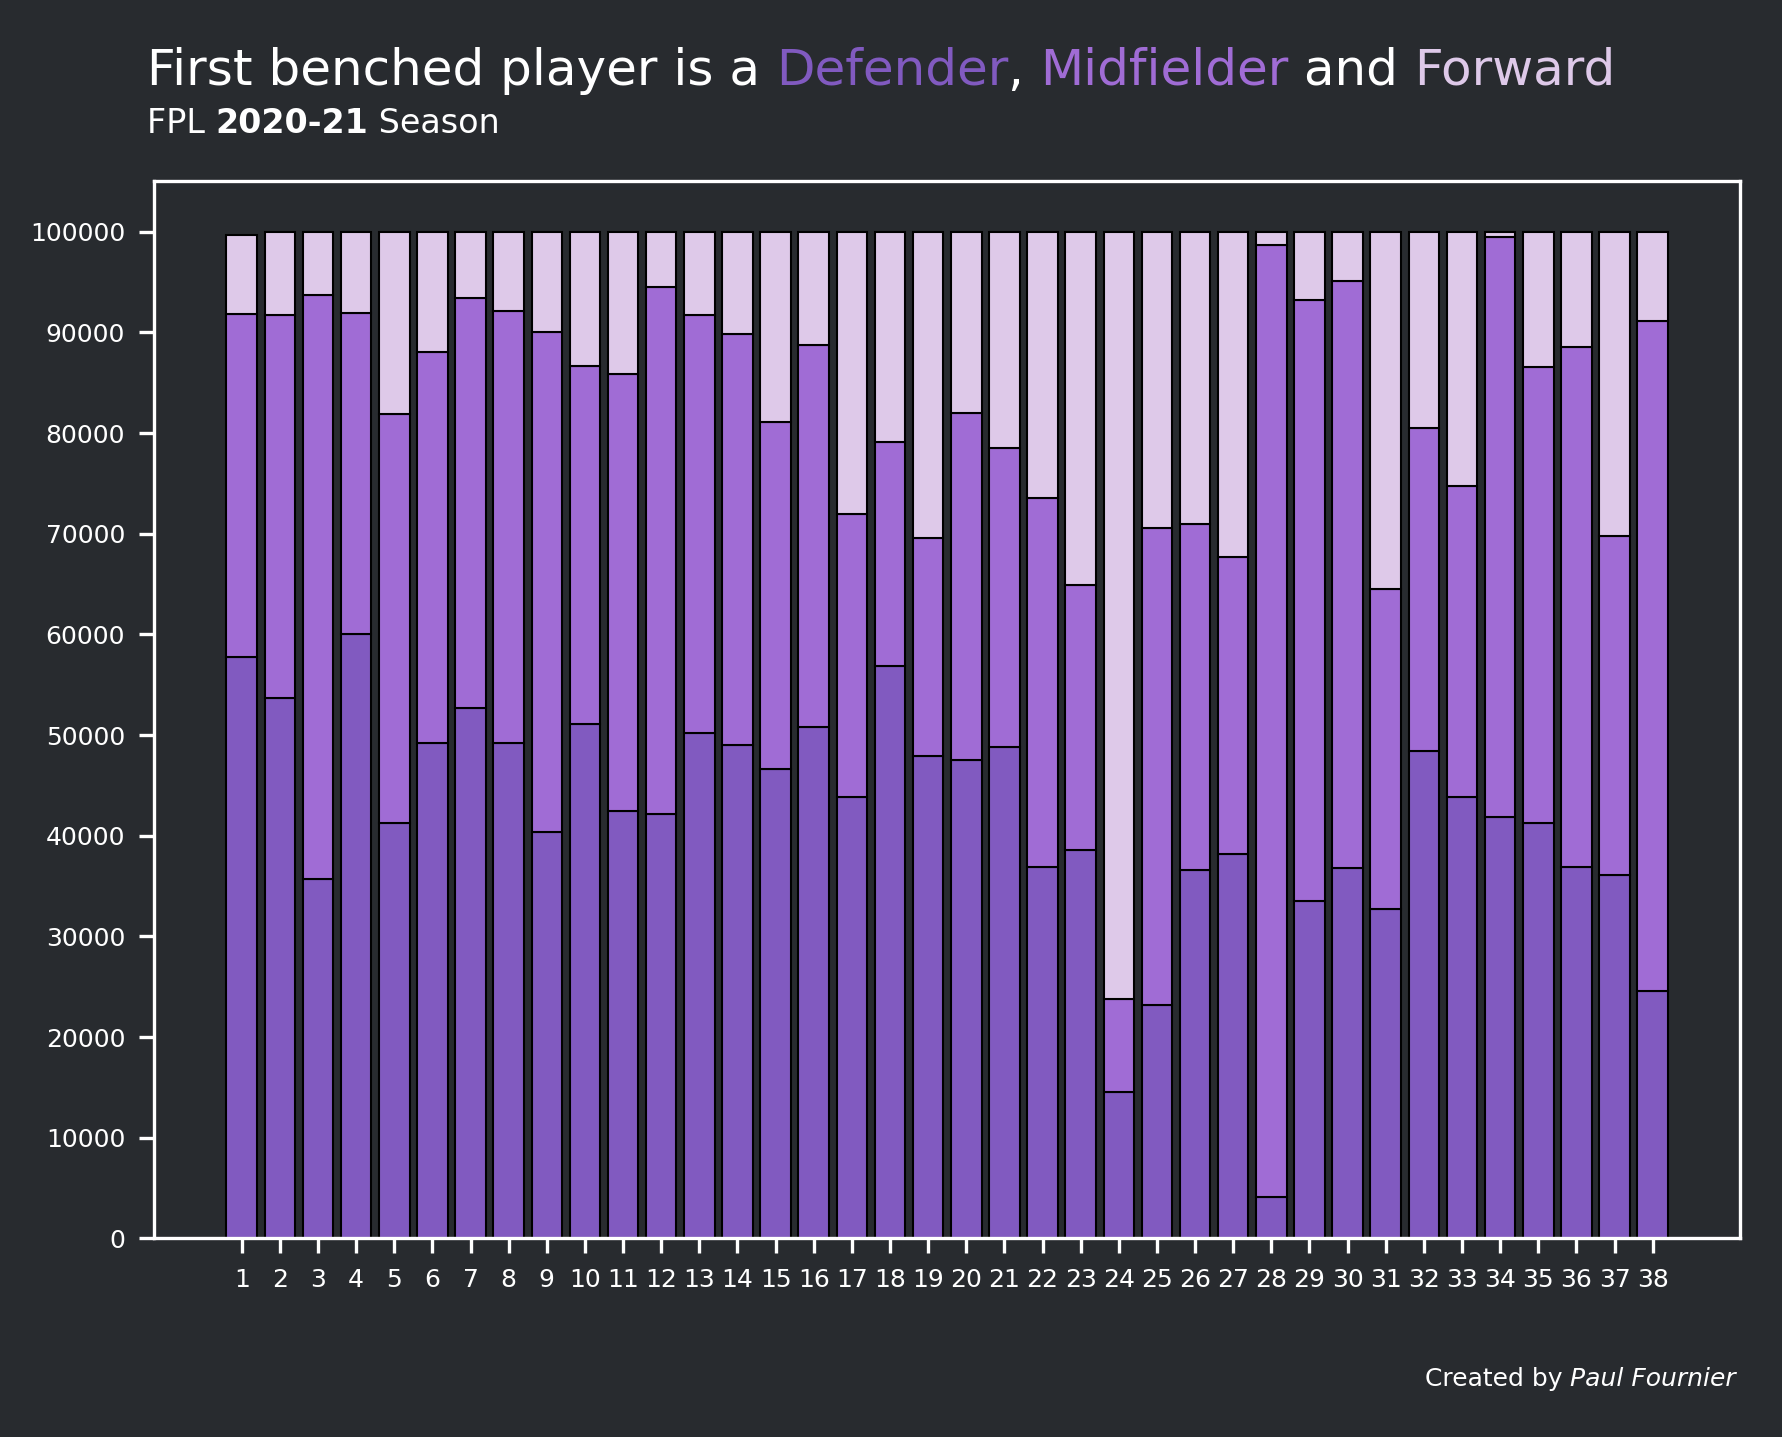

In [5]:
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6

fig, ax = plt.subplots(tight_layout=True)
fig.set_facecolor(background)
ax.patch.set_alpha(0)

bench_def, bench_mid, bench_fwd = [], [], []

for gw in range(1, 39):
    bench_def.append(
        sum(bench_order.loc[:, str(gw)] < 200) -
        sum(bench_order.loc[:, str(gw)] == 0))
    bench_mid.append(
        sum(bench_order.loc[:, str(gw)] < 300) -
        sum(bench_order.loc[:, str(gw)] < 200))
    bench_fwd.append(sum(bench_order.loc[:, str(gw)] > 300))

ax.bar(
    np.arange(1, 39), bench_def, label='Def',
    color='#815ac0', edgecolor='black', linewidth=0.5)
bottom_y = np.array(bench_def)

ax.bar(
    np.arange(1, 39), bench_mid, label='Mid',
    color='#a06cd5', edgecolor='black', linewidth=0.5,
    bottom=bottom_y)
bottom_y += np.array(bench_mid)

ax.bar(
    np.arange(1, 39), bench_fwd, label='Fwd',
    color='#dec9e9', edgecolor='black', linewidth=0.5,
    bottom=bottom_y)

ax.set_xticks(np.arange(1, 39), minor=False)
ax.set_yticks(np.arange(0, 110000, 10000), minor=False)

fig_text(
    x=0.09, y=1.075,
    s="First benched player is a <Defender>, <Midfielder> and <Forward>",
    highlight_textprops=[
        {"color": '#815ac0'},
        {"color": '#a06cd5'},
        {"color": '#dec9e9'},
        ],
    fontsize=12, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=0.09, y=1.025,
    s="FPL <2020-21> Season",
    highlight_textprops=[{"fontweight": "bold"}],
    fontsize=8, fontfamily=title_font, color=text_color, alpha=1)

fig_text(
    x=0.8, y=-0.025,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=6, fontfamily=watermark_font, color=text_color)

plt.show()

This histogram shows which player is placed as the first automatic substitute on the bench. When a player does not play a single minute during a gameweek, and a benched player did, then they are switched. The first player on the bench that ensures the team formation is allowed is selected.

This graph is harder to interpret. Since most managers place their attacking players on the pitch, the data position most prominently selected as the first bench option is the defenders. This suggests that managers select low budget 

### Captain


In [6]:
path = '../data/fpl_official/2020-21/season/processed/'
all_files = (
    glob.glob(os.path.join(path, "captain_position_[0-9][0-9][0-9][0-9].csv")) +
    glob.glob(os.path.join(path, "captain_position_[0-9][0-9][0-9][0-9][0-9].csv")) + 
    glob.glob(os.path.join(path, "captain_position_100000.csv"))
)

captain_position = (
    pd.read_csv(f, index_col=0)
    for f in all_files)
captain_position = pd.concat(captain_position)
captain_position.sort_index(inplace=True)

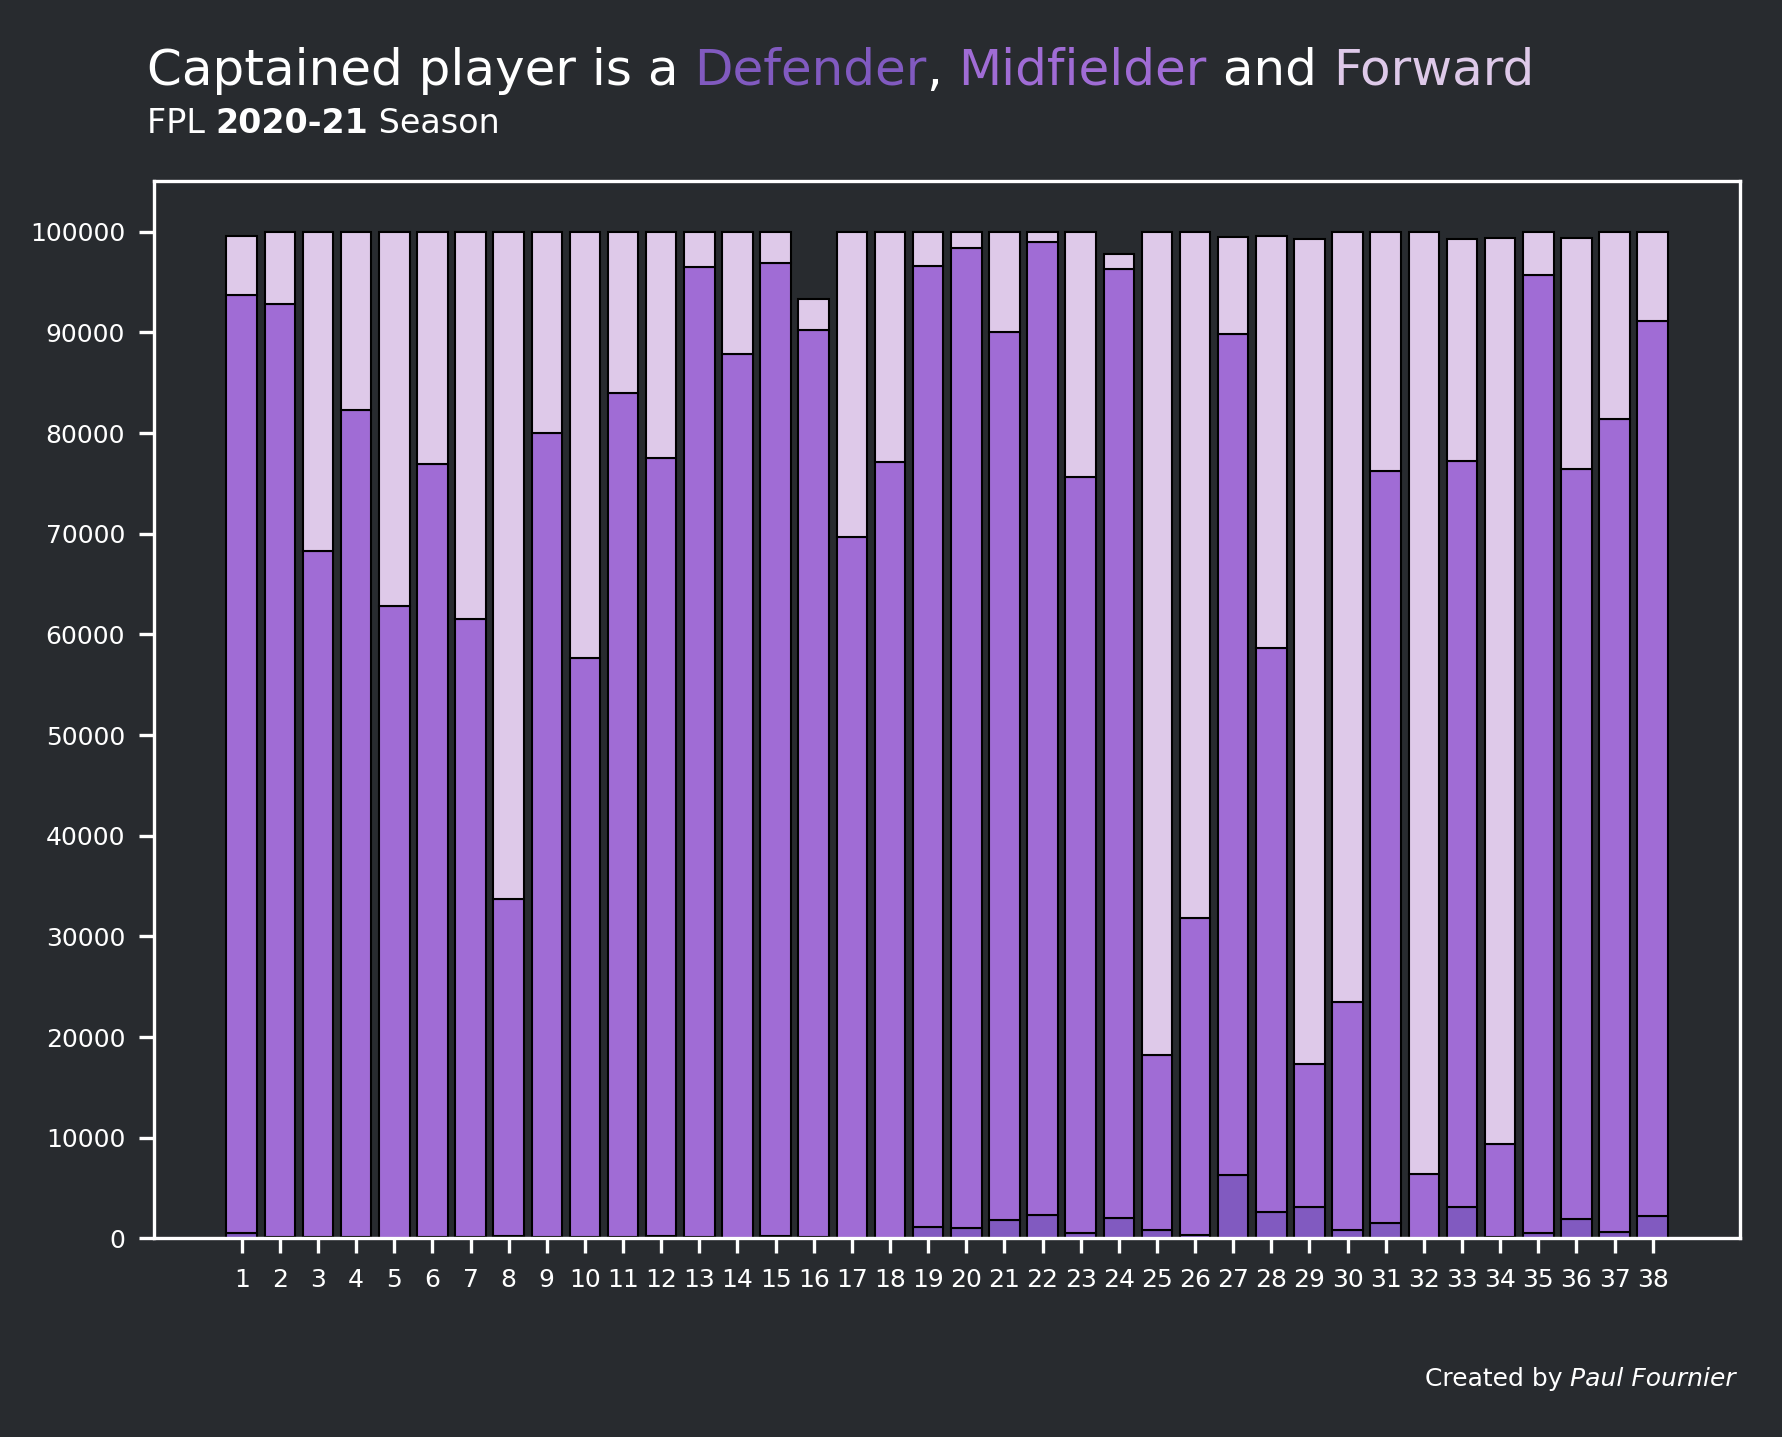

In [7]:
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6

fig, ax = plt.subplots(tight_layout=True)
fig.set_facecolor(background)
ax.patch.set_alpha(0)

cap_def, cap_mid, cap_fwd = [], [], []

for gw in range(1, 39):
    cap_def.append(sum(captain_position.loc[:, str(gw)] == 1))
    cap_mid.append(sum(captain_position.loc[:, str(gw)] == 2))
    cap_fwd.append(sum(captain_position.loc[:, str(gw)] == 3))

ax.bar(
    np.arange(1, 39), cap_def, label='Def',
    color='#815ac0', edgecolor='black', linewidth=0.5)
bottom_y = np.array(cap_def)

ax.bar(
    np.arange(1, 39), cap_mid, label='Mid',
    color='#a06cd5', edgecolor='black', linewidth=0.5,
    bottom=bottom_y)
bottom_y += np.array(cap_mid)

ax.bar(
    np.arange(1, 39), cap_fwd, label='Fwd',
    color='#dec9e9', edgecolor='black', linewidth=0.5,
    bottom=bottom_y)

ax.set_xticks(np.arange(1, 39), minor=False)
ax.set_yticks(np.arange(0, 110000, 10000), minor=False)

fig_text(
    x=0.09, y=1.075,
    s="Captained player is a <Defender>, <Midfielder> and <Forward>",
    highlight_textprops=[
        {"color": '#815ac0'},
        {"color": '#a06cd5'},
        {"color": '#dec9e9'},
        ],
    fontsize=12, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=0.09, y=1.025,
    s="FPL <2020-21> Season",
    highlight_textprops=[{"fontweight": "bold"}],
    fontsize=8, fontfamily=title_font, color=text_color, alpha=1)

fig_text(
    x=0.8, y=-0.025,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=6, fontfamily=watermark_font, color=text_color)

plt.show()

The data shows that the overwhelming majority of managers select attacking FPL assets as their captain.